<center>
    <img src="https://www.dates-concours.ma/wp-content/uploads/2019/05/ENSET-Mohemmedia-300x141.png" width="300" alt="ENSET logo"  />
</center>

# Machine Learning – Linear Regression 
### By Hamza El Anssari 

Estimated time needed: **60** minutes

## Objectives

After completing this lab you will be able to:

-   Build a Regression Model
-   Use Gradient Descent
-   Standardize and Normalize Data

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a>Packages</a></li>
    <li><a>Exercice 1 : Concepts de base</a></li>
    <li><a>Exercice 2 : Simple LinearRegression avec sklearn</a></li>
    <li><a>Exercice 3 : Simple LinearRegression – étude de mse en fonction de w0 et w1</a></li>
</ul>
    
</div>
 
<hr>

### 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- [seaborn](http://seaborn.pydata.org/) is a library that uses Matplotlib underneath to plot graphs. 
- [pandas](http://pandas.pydata.org/) is a library for data analysis and manipulation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2 - Exercice 1 ##

**1 - Que représente un dataset en machine learing :**<br>
    Dataset est une collection de données et c'est ce que nous voulons analyser dans les projets d'apprentissage automatique.

**2 - Que représente les éléments suivants :**<br>
<b>− Features :</b> Les données que nous voulons utiliser dans le modèle pour prédire label.<br>
<b>− Target :</b> Le résultat que vous obtenez de votre modèle après l'entraînement.

**3 - Donner une brève définition à Linear Regression :**<br>
La Régression Linéaire est une approche linéaire de la modélisation de la relation entre une variable dépendante et une ou plusieurs variables indépendantes.

**4 - Donner une brève définition à Simple Linear Regression et Multivariate Linear Regression :**<br>
<b>− Simple Linear Regression :</b> Un modèle utilisé pour montrer ou prédire la relation entre deux variables ou facteurs.<br>
<b>− Multivariate Linear Regression :</b> La régression linéaire multiple est une technique statistique qui utilise plusieurs variables pour prédire le résultat d'une variable de réponse.

**5 - Ecrire la forme mathématique de LinearRegression model :**<br>
<li>Simple Linear Regression</li><br>
$$Target = {Bias} + {Weight}*{feature }$$
<li>Multiple Linear Regression</li><br>
$$Target = {Bias} + \sum\limits_{i = 1}^{m} {Weight[i]}*{features[i]}$$

**6 - Quelles sont les étapes à suivre pour créer un modèle :**<br>

<center>
    <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/steps-of-general-machine-learning-pipeline.JPG" width="700" alt="ENSET logo"  />
</center>

<hr>

### 3 - Exercice 2 : Simple LinearRegression avec sklearn ##
Dans cet exercice, on doit connaitre comment :
<li>Récupérer des données à partir d’un fichier scv et découvrir ses principales caractéristiques</li>
<li>Visualiser les données sous forme de graphe (program 2 en annexe)</li>

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<b>Checking NaN values</b>

In [4]:
pd.DataFrame(data=df.isnull().sum(),columns=['Num of NaN']).T

,TV,Radio,Newspaper,Sales
Num of NaN,0,0,0,0


## TV

In [6]:
X_TV = df[['TV']]
y_TV = df['Sales']

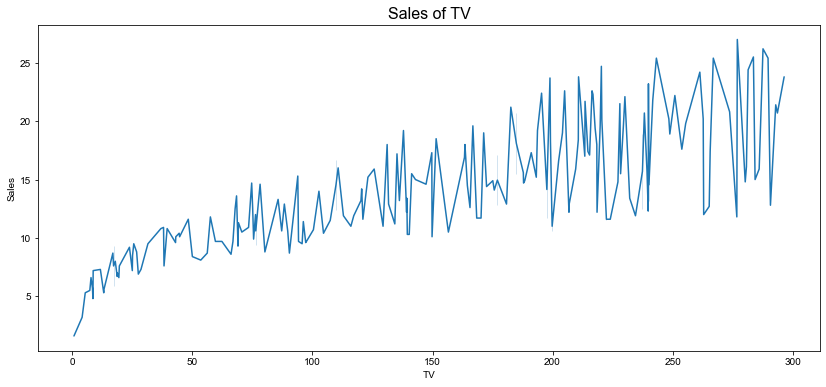

In [7]:
plt.figure(figsize=(14,6))
plt.title("Sales of TV",fontsize = 16)
sns.set_style("darkgrid")
sns.lineplot(x='TV',y='Sales',data=df)
plt.show()

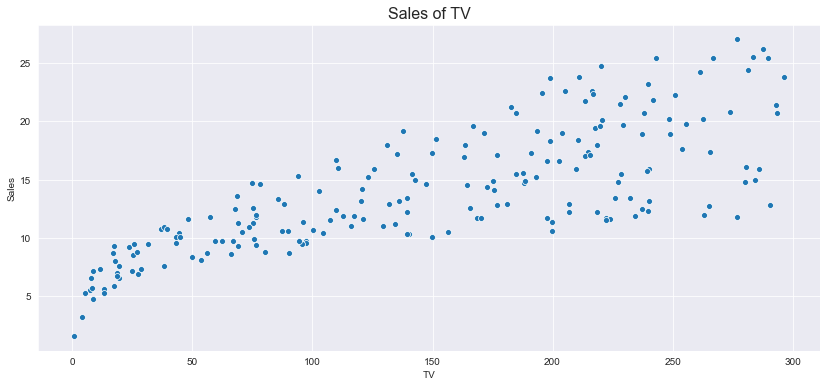

In [9]:
plt.figure(figsize=(14,6))
plt.title("Sales of TV",fontsize = 16)
sns.set_style("darkgrid")
sns.scatterplot(x='TV',y='Sales',data=df)
plt.show()

In [8]:
def Model(X,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)
    model = LinearRegression().fit(X_train, y_train)
    return X_train, X_test, y_train, y_test, model

In [9]:
X_train, X_test, y_train, y_test, model = Model(X_TV,y_TV)
model.intercept_

7.292493773559356

In [10]:
model.coef_

array([0.04600779])

In [11]:
model.predict(X_TV)

array([17.87888616,  9.33984041,  8.08382775, 14.2626739 , 15.61070213,
        7.69276154,  9.93794168, 12.82263008,  7.68816076, 16.48485014,
       10.33360867, 17.1703662 ,  8.38747917, 11.77825326, 16.68268363,
       16.28241586, 10.41182191, 20.23908577, 10.47623281, 14.06944118,
       17.34059502, 18.21474303,  7.8997966 , 17.79607214, 10.15877907,
       19.38794166, 13.86700691, 18.33896406, 18.73923183, 10.54064372,
       20.76817535, 12.48677322, 11.76445092, 19.51216269, 11.69543924,
       20.66695821, 19.57197282, 10.72927566,  9.27542951, 17.7822698 ,
       16.60907117, 15.43587253, 20.8003808 , 16.81150544,  8.44728929,
       15.34845773, 11.4193925 , 18.3297625 , 17.74546357, 10.3704149 ,
       16.48485014, 11.91167585, 17.24857944, 15.69351616, 19.3787401 ,
       16.44344313,  7.62835064, 13.55875472, 16.99093582, 16.98633504,
        9.75391052, 19.3143292 , 18.30215783, 12.01749377, 13.32411499,
       10.46703126,  8.74173915, 13.70137887, 18.21474303, 17.26

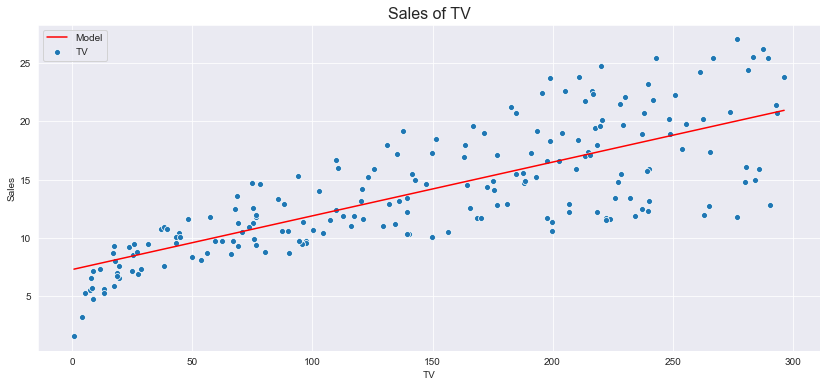

In [12]:
plt.figure(figsize=(14,6))
plt.title("Sales of TV",fontsize = 16)
sns.set_style("darkgrid")
sns.lineplot(x='TV',y=model.predict(X_TV), color = "red",label='Model',data=df)
sns.scatterplot(x='TV',y='Sales',label='TV',data=df)
plt.show()

<li>Mean Squared Error (MSE)</li>
$$MSE = \frac{1}{m} \sum\limits_{i = 1}^{m}(y_p{(i)}  -  y_r{(i)})^2$$
<li>Mean Absolute Error (MAE))</li>
$$MAE = \frac{1}{m} \sum\limits_{i = 1}^{m}|y_p{(i)}  -  y_r{(i)}|$$

In [14]:
def MSE(y_p, y_r):
    return (1/len(y_r))*(np.sum((y_p - y_r)**2))

def MAE(y_p, y_r):
    return (1/len(y_r))*(np.sum(abs(y_p - y_r)))

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def Errors():
    print('mean absolute error of trainig data :',mean_absolute_error(y_train,model.predict(X_train)))
    print('mean squared error of trainig data :',mean_squared_error(y_train,model.predict(X_train)))
    print('-----------------------------------------------------------')
    print('mean absolute error of testing data :',mean_absolute_error(y_test,model.predict(X_test)))
    print('mean squared error of testing data :',mean_squared_error(y_test,model.predict(X_test)))

In [16]:
def Errors_Manually():
    print('mean absolute error of trainig data :',MAE(y_train,model.predict(X_train)))
    print('mean squared error of trainig data :',MSE(y_train,model.predict(X_train)))
    print('-----------------------------------------------------------')
    print('mean absolute error of testing data :',MAE(y_test,model.predict(X_test)))
    print('mean squared error of testing data :',MSE(y_test,model.predict(X_test)))

In [17]:
Errors()

mean absolute error of trainig data : 2.5786705177857354
mean squared error of trainig data : 10.617238416139852
-----------------------------------------------------------
mean absolute error of testing data : 2.505418178966002
mean squared error of testing data : 10.186181934530211


In [17]:
Errors_Manually()

mean absolute error of trainig data : 2.5786705177857354
mean squared error of trainig data : 10.617238416139854
-----------------------------------------------------------
mean absolute error of testing data : 2.505418178966002
mean squared error of testing data : 10.186181934530211


<hr>

## Radio

In [18]:
X_Radio = df[['Radio']]
y_Radio = df['Sales']

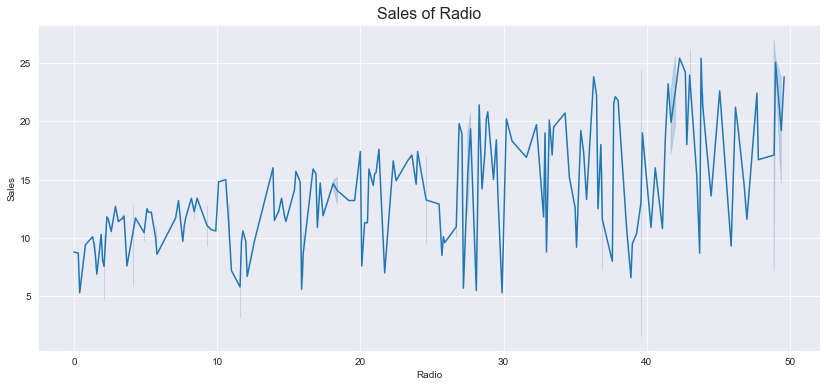

In [19]:
plt.figure(figsize=(14,6))
plt.title("Sales of Radio",fontsize = 16)
sns.set_style("darkgrid")
sns.lineplot(x='Radio',y='Sales',data=df)
plt.show()

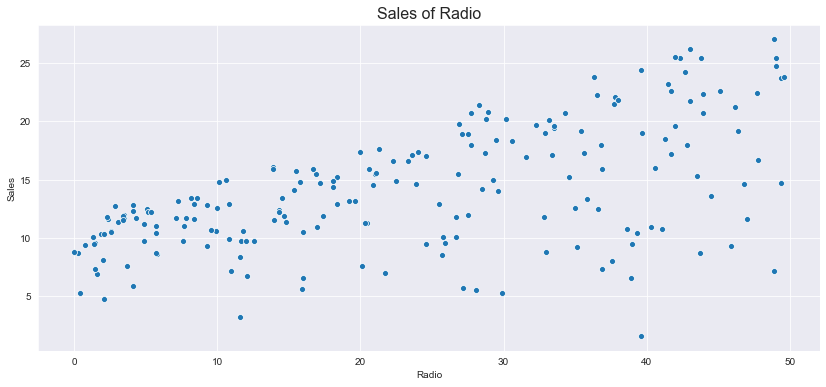

In [20]:
plt.figure(figsize=(14,6))
plt.title("Sales of Radio",fontsize = 16)
sns.set_style("darkgrid")
sns.scatterplot(x='Radio',y='Sales',data=df)
plt.show()

In [21]:
X_train, X_test, y_train, y_test, model = Model(X_Radio,y_Radio)
model.intercept_

9.387577017342661

In [22]:
model.coef_

array([0.20651177])

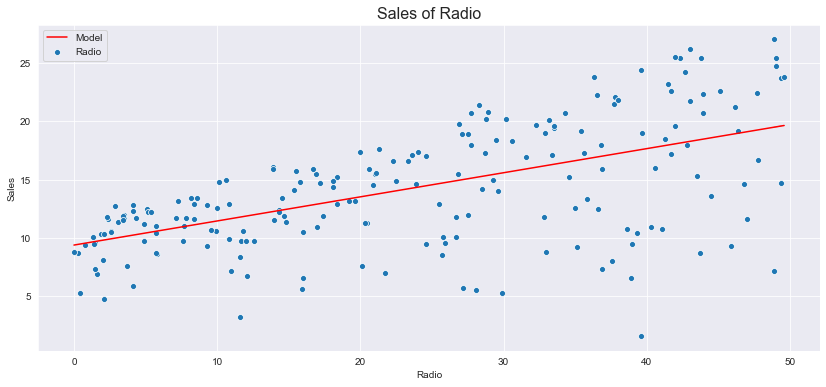

In [23]:
plt.figure(figsize=(14,6))
plt.title("Sales of Radio",fontsize = 16)
sns.set_style("darkgrid")
sns.lineplot(x='Radio',y=model.predict(X_Radio), color = "red",label='Model',data=df)
sns.scatterplot(x='Radio',y='Sales',label='Radio',data=df)
plt.show()

In [24]:
Errors()

mean absolute error of trainig data : 3.1938472281832535
mean squared error of trainig data : 16.596466917138972
-----------------------------------------------------------
mean absolute error of testing data : 3.7170557782348
mean squared error of testing data : 24.23723303713214


In [25]:
Errors_Manually()

mean absolute error of trainig data : 3.1938472281832535
mean squared error of trainig data : 16.596466917138972
-----------------------------------------------------------
mean absolute error of testing data : 3.7170557782348
mean squared error of testing data : 24.237233037132142


<hr>

### 4 - Exercice 3 : Simple LinearRegression – étude de mse en fonction de w0 et w1 ###

<b>Notes :</b>
<ul><li>Un modèle de régression s’écrit sous la forme suivante : $$y = {w0} + {w1}*{x}$$  Où, w0 est l’intercept et w1 est la pente(slope)</li></ul>


<ul><li>Pour un problème de régression, on peut trouver plusieurs modèles (hypothèse) :</li>
<ul>chaque valeur de w0 et de w1 donne lieu à un modèle :
    <li>w0=0 et w1=0 : un modèle</li>
    <li>w0=0 et w1=0.5 un modèle</li>
    <li>w0=0.5 et w1=1 un modèle</li>
</ul>
</ul>
<ul><li>L’objectif est de :</li>
    <ul><li>Connaitre en détail le processus de Learning pour trouver le meilleur modèle</li>
<li>Comment identifier un meilleur modèle ? Autrement dit comment trouver les valeurs de w0 et W1 qui
    représentent le meilleur modèle</li></ul></ul>
<ul><li>Idée de base :</li>
    <ul><li>Le meilleur modèle est celui qui minimise MSE (Mean Squared Error)</li>
<li>Quelle est la valeur de w0 et la valeur de W1, combinées ensemble pour minimiser l’erreur
    MSE s’écrit sous la forme suivante</li>
        $$MSE = \frac{1}{m} \sum\limits_{i = 1}^{m}(y_p{(i)}  -  y_r{(i)})^2$$
    </ul></ul>

<hr>
<b>La fonction 𝒎𝒔𝜺 en fonction de w0 (intercept,bias) et w1 (coef, slope)</b>

In [125]:
def model(w0, w1, X):
    
    return w0 + w1*np.array(X)

In [126]:
def MSE(w0, w1, y_r, X):
    y_p = model(w0, w1, X)
    return (1/len(y_r))*(np.sum((y_p - y_r)**2))

In [20]:
X_1 = [1,2,3,4]
Y_1 = [1,2,3,4]
dataset_1 = pd.DataFrame(data= list(zip(X_1,Y_1)), columns=['X','Y'])
dataset_1

,X,Y
0,1,1
1,2,2
2,3,3
3,4,4


In [21]:
model_1_0 = model(0, 0, dataset_1['X'])
model_1_1 = model(0, 0.5, dataset_1['X'])
model_1_2 = model(0, 1, dataset_1['X'])
pd.DataFrame(data = list(zip(model_1_0,model_1_1,model_1_2)), columns = ['w1=0','w1=0.5','w1=1'])

,w1=0,w1=0.5,w1=1
0,0,0.5,1
1,0,1.0,2
2,0,1.5,3
3,0,2.0,4


In [22]:
errors = pd.DataFrame(data = [MSE(0, 0, Y_1, X_1), MSE(0, 0.5, Y_1, X_1), MSE(0, 1, Y_1, X_1)],  index = ['w1=0','w1=0.5','w1=1'], columns = ['MSE'])
errors

,MSE
w1=0,7.500
w1=0.5,1.875
w1=1,0.000


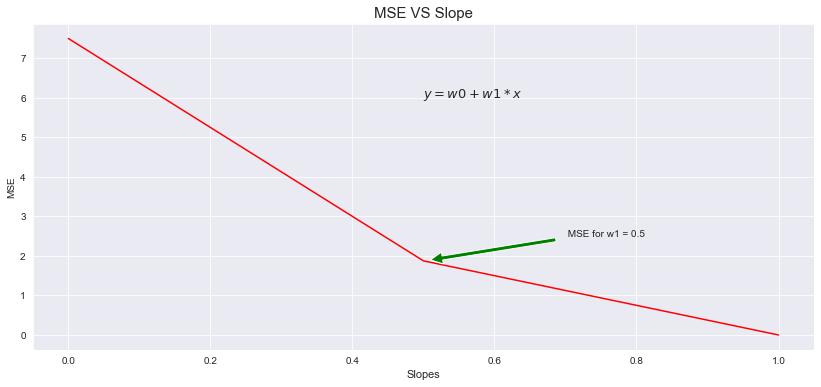

In [23]:
plt.figure(figsize=(14,6))
plt.title("MSE VS Slope",fontsize = 15)
sns.set_style("darkgrid")
sns.lineplot(x=[0,0.5,1],y='MSE', color = "red",data=errors)
plt.annotate(' MSE for w1 = 0.5', xy=(0.5,1.87), xytext=(0.7,2.5),
            arrowprops=dict(facecolor='green', shrink=0.05))
plt.xlabel('Slopes', fontsize = 11)
plt.text(0.5,6 , r'$y = w0 + w1*x$', fontsize=13)

plt.show()

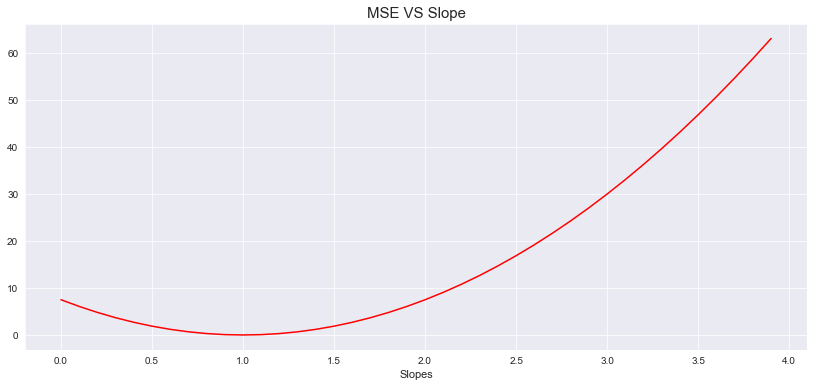

In [24]:
Y = [MSE(0, w, Y_1, X_1) for w in list(np.arange(0.,4.,0.1))]
plt.figure(figsize=(14,6))
plt.title("MSE VS Slope",fontsize = 15)
sns.set_style("darkgrid")
sns.lineplot(x=np.arange(0.,4.,0.1),y= Y, color = "red",data=errors)
plt.xlabel('Slopes', fontsize = 11)
plt.show()

Text(0.5, 0, 'Slopes')

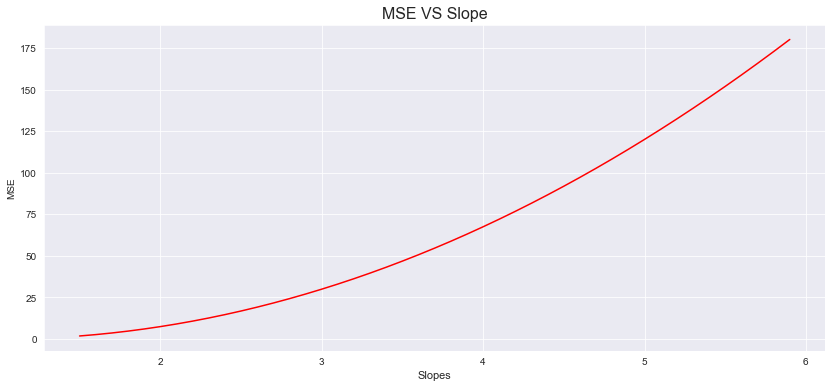

In [25]:
Y = [MSE(0, w, Y_1, X_1) for w in list(np.arange(1.5,6.,0.1))]
plt.figure(figsize=(14,6))
plt.title("MSE VS Slope",fontsize = 16)
sns.set_style("darkgrid")
sns.lineplot(x=np.arange(1.5,6.,0.1),y= Y, color = "red",data=errors)
plt.ylabel('MSE')
plt.xlabel('Slopes', fontsize = 11)

### 5 - Exercice 4 :  Simple LinearRegression – Gradient Descent, Learning Algorithm step1

In [79]:
X = [1,2,3,4]
y_1 = [1,2,3,4]
y_2 = [4,7,10,13]
y_3 = [1.15,1.8,2.45,3.1]

def learing(X):
    w0=0
    w1=0
    y_predicted= np.dot(w1,X)+w0
    print("y_predicted:{}".format(y_predicted)) 
learing(X)

y_predicted:[0 0 0 0]


In [43]:
def learing_MSE(X, y):
    w0=0
    w1=0
    y_predicted= np.dot(w1,X)+w0
    mse = mean_squared_error(y,y_predicted)
    print("mse:{}".format(mse)) 
learing_MSE(X,y)

mse:5.043750000000001


In [80]:
def learing_P1(X, y, w1):
    w0=0
    mse_list = []
    for w in w1:
        y_predicted= np.dot(w,X)+w0
        mse = mean_squared_error(y,y_predicted)
        mse_list.append(mse)
        #print("w1:{} | y_predicted:{} | mse:{}".format(w,y_predicted,mse)) 
    print("le W1 qui donne mse plus proche à 0 w1:{}".format(w1[np.argmin(mse_list)]))
    sns.lineplot(w1, mse_list)

le W1 qui donne mse plus proche à 0 w1:1.0


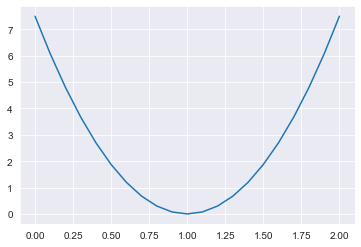

In [84]:
learing_P1(X,y_1,np.arange(0,2.1,0.1))

le W1 qui donne mse plus proche à 0 w1:2.0


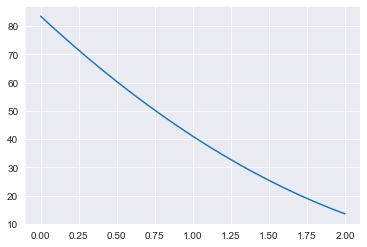

In [86]:
learing_P1(X,y_2,np.arange(0,2.1,0.1))

le W1 qui donne mse plus proche à 0 w1:0.8


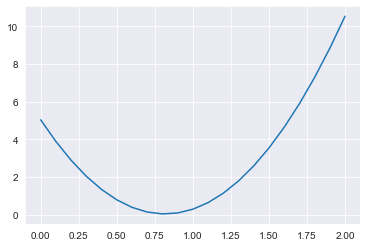

In [87]:
learing_P1(X,y_3,np.arange(0,2.1,0.1))

le W1 qui donne mse plus proche à 0 w1:2.0


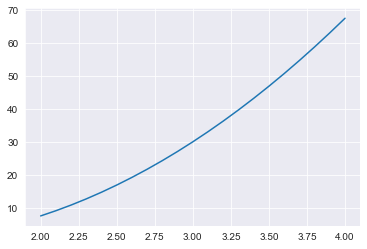

In [88]:
learing_P1(X,y_1,np.arange(2,4.1,0.1))

le W1 qui donne mse plus proche à 0 w1:3.300000000000001


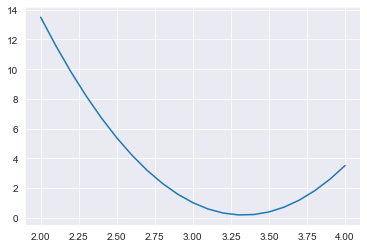

In [89]:
learing_P1(X,y_2,np.arange(2,4.1,0.1))

le W1 qui donne mse plus proche à 0 w1:2.0


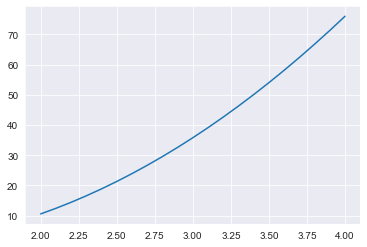

In [90]:
learing_P1(X,y_3,np.arange(2,4.1,0.1))

### 6 - Exercice 5 :  Simple LinearRegression – Gradient Descent, Learning Algorithm step1

In [95]:
def learing2(X,y):
    w0=0
    w1=0
    nb_iterations=1000
    learning_rate = 0.001
    mse_list=[]
    for i in range(nb_iterations):
        y_predicted=np.dot(w1,X)+w0
        #print("w0:{} --- w1:{} -- y_predicted:{} --> ERROR: {}".format(w0,w1,y_predicted, mean_squared_error(y,y_predicted)))
        dw1=-(2/4)*sum(X*(y-y_predicted))
        dw0=-(2/4)*sum((y-y_predicted))
        w1=w1-learning_rate*dw1
        w0=w0-learning_rate*dw0
        mse_list.append(mean_squared_error(y,y_predicted))
    plt.xlabel('Iteration' , fontsize = 12)
    plt.ylabel('Error' , fontsize = 12)
    plt.title ('Iterations VS Error',fontsize = 14)
    sns.lineplot(range(nb_iterations),mse_list)
    plt.show()

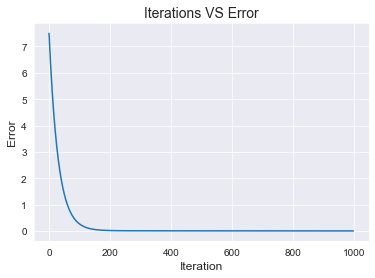

In [96]:
learing2(X,y_1)

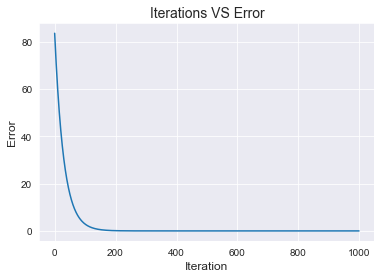

In [97]:
learing2(X,y_2)

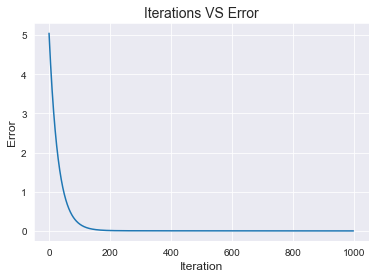

In [98]:
learing2(X,y_3)

### 7 - Exercice 6 : Simple LinearRegression – Gradient Descent, Learning Algorithm step3

In [135]:
def learing2(X,y): #ligne1
    w0=0 #ligne2
    w1=0 #ligne3
    learning_rate=0.001 #ligne4
    mse_list = []
    w0_list = []
    w1_list = []

    for i in range(1000):
        y_predicted=np.dot(w1,X)+w0
        #print("w0:{} --- w1:{} -- y_predicted:{} --> ERROR: {}".format(w0,w1,y_predicted, mean_squared_error(y_predicted,y))) #ligne7
        dw1=-(2/4)*sum(X*(y-y_predicted))
        dw0=-(2/4)*sum((y-y_predicted))
        w0=w0-learning_rate*dw0 #ligne8
        w1=w1-learning_rate*dw1 #ligne9
        mse_list.append(mean_squared_error(y_predicted,y))
        w0_list.append(w0)
        w1_list.append(w1)    
    print("le W0 et W1 qui donne le plus proche mse à 0 w0:{} et w1:{}".format(w0_list[np.argmin(mse_list)],w1_list[np.argmin(mse_list)]))
    w0,w1=w0_list[np.argmin(mse_list)],w1_list[np.argmin(mse_list)]
    return w0 + w1*np.array(X)

In [136]:
y_predicted=learing2(X,y_1)

le W0 et W1 qui donne le plus proche mse à 0 w0:0.22597002176020783 et w1:0.9231425878031736


In [137]:
y_predicted

array([1.14911261, 2.0722552 , 2.99539779, 3.91854037])

le W0 et W1 qui donne le plus proche mse à 0 w0:0.22597002176020783 et w1:0.9231425878031736


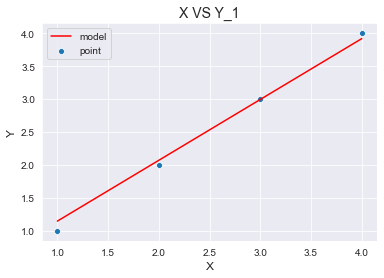

In [144]:
plt.xlabel('X' , fontsize = 12)
plt.ylabel('Y' , fontsize = 12)
plt.title ('X VS Y_1',fontsize = 14)
sns.lineplot(X,learing2(X,y_1),label='model',color='red')
sns.scatterplot(X,y_1,label='point')
plt.show()

le W0 et W1 qui donne le plus proche mse à 0 w0:1.0135305965072565 et w1:2.9953977851697293


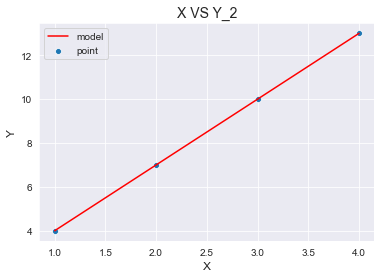

In [145]:
plt.xlabel('X' , fontsize = 12)
plt.ylabel('Y' , fontsize = 12)
plt.title ('X VS Y_2',fontsize = 14)
sns.lineplot(X,learing2(X,y_2),label='model',color='red')
sns.scatterplot(X,y_2,label='point')
plt.show()

le W0 et W1 qui donne le plus proche mse à 0 w0:0.3146907797574514 et w1:0.7130276929521666


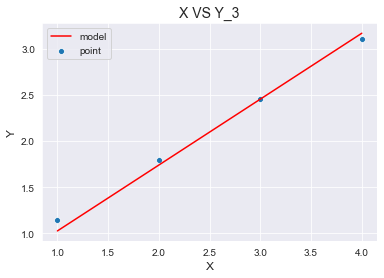

In [147]:
plt.xlabel('X' , fontsize = 12)
plt.ylabel('Y' , fontsize = 12)
plt.title ('X VS Y_3',fontsize = 14)
sns.lineplot(X,learing2(X,y_3),label='model',color='red')
sns.scatterplot(X,y_3,label='point')
plt.show()